In [355]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [356]:
sns.set_theme()

In [357]:
sns.set(rc={'figure.figsize':(15,7)})

In [358]:
Time_Series_1 = pd.read_csv('Time_Series_1.csv')

In [359]:
Time_Series_1

,CODARTIC,CODIREGG,IMPLINEA,IMPVENTA,CODTAVEN,QCANTDEC,NUMTARJE
0,10254201003449,1,59.99,59.99,2022-06-21001069602336387,1.0,6.008330e+18
1,10234141001560,1,12.72,12.72,2021-08-03001002100821700,1.0,NaN
2,10865290000019,4,11.20,11.20,2022-08-21001009006714129,1.0,6.008330e+18
3,10004136025419,1,48.97,48.97,2022-07-09001003602372694,1.0,NaN
4,10073131011804,1,22.95,22.95,2022-05-14001091203649080,1.0,6.008330e+18
...,...,...,...,...,...,...,...
704350,10271412016641,1,18.90,18.90,2022-02-10001003601776985,1.0,NaN
704351,10411524000184,2,-29.99,-29.99,2022-06-02001009803937030,-1.0,NaN
704352,10092532091505,1,75.00,75.00,2022-05-19001003602477163,1.0,6.008330e+18
704353,10805731000015,2,-12.59,-10.70,2022-02-17001009008963198,-1.0,6.008330e+18


In [360]:
Time_Series_1['Fecha'] = Time_Series_1['CODTAVEN'].str[0:10]

In [361]:
Time_Series_1['Fecha'] = pd.to_datetime(Time_Series_1['Fecha'])

Time_Series_1['Dia'] = Time_Series_1['Fecha'].dt.day

Time_Series_1['Semana'] = Time_Series_1['Fecha'].dt.week

Time_Series_1['Mes'] = Time_Series_1['Fecha'].dt.month

Time_Series_1['Trimestre'] = Time_Series_1['Fecha'].dt.quarter

Time_Series_1['Año'] = Time_Series_1['Fecha'].dt.year

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9676\2992499271.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Time_Series_1['Semana'] = Time_Series_1['Fecha'].dt.week


In [362]:
Time_Series_1 = Time_Series_1.loc[: , ['Fecha', 'Dia', 'Semana', 'Mes', 'Trimestre', 'Año', 'IMPVENTA']]

In [363]:
Time_Series_1

,Fecha,Dia,Semana,Mes,Trimestre,Año,IMPVENTA
0,2022-06-21,21,25,6,2,2022,59.99
1,2021-08-03,3,31,8,3,2021,12.72
2,2022-08-21,21,33,8,3,2022,11.20
3,2022-07-09,9,27,7,3,2022,48.97
4,2022-05-14,14,19,5,2,2022,22.95
...,...,...,...,...,...,...,...
704350,2022-02-10,10,6,2,1,2022,18.90
704351,2022-06-02,2,22,6,2,2022,-29.99
704352,2022-05-19,19,20,5,2,2022,75.00
704353,2022-02-17,17,7,2,1,2022,-10.70


In [364]:
Time_Series_1.sort_values(by='Fecha')

,Fecha,Dia,Semana,Mes,Trimestre,Año,IMPVENTA
499190,2021-06-01,1,22,6,2,2021,39.00
529105,2021-06-01,1,22,6,2,2021,749.00
562238,2021-06-01,1,22,6,2,2021,289.95
275542,2021-06-01,1,22,6,2,2021,34.97
579022,2021-06-01,1,22,6,2,2021,39.95
...,...,...,...,...,...,...,...
478794,2022-12-31,31,52,12,4,2022,8.35
200204,2022-12-31,31,52,12,4,2022,99.95
79204,2022-12-31,31,52,12,4,2022,7.50
681964,2022-12-31,31,52,12,4,2022,115.00


## Monthly Time Series

In [365]:
Monthly_Time_Series_1 = Time_Series_1.groupby(['Año', 'Mes'])['IMPVENTA'].sum().reset_index(drop=False)

In [366]:
Monthly_Time_Series_1

,Año,Mes,IMPVENTA
0,2021,6,992891.50
1,2021,7,982142.75
2,2021,8,885289.16
3,2021,9,878563.14
4,2021,10,923552.45
5,2021,11,1527486.61
6,2021,12,1438722.72
7,2022,1,1910816.46
8,2022,2,1317501.34
9,2022,3,1524652.47


Cambiamos las columnas Año y Mes a formato String y creamos la columna Mes-Año

In [367]:
Monthly_Time_Series_1['Año'] = Monthly_Time_Series_1['Año'].astype('string')
Monthly_Time_Series_1['Mes'] = Monthly_Time_Series_1['Mes'].astype('string')

Monthly_Time_Series_1['Mes-Año'] = Monthly_Time_Series_1[['Mes', 'Año']].agg('-'.join, axis=1)

In [368]:
Monthly_Time_Series_1

,Año,Mes,IMPVENTA,Mes-Año
0,2021,6,992891.50,6-2021
1,2021,7,982142.75,7-2021
2,2021,8,885289.16,8-2021
3,2021,9,878563.14,9-2021
4,2021,10,923552.45,10-2021
5,2021,11,1527486.61,11-2021
6,2021,12,1438722.72,12-2021
7,2022,1,1910816.46,1-2022
8,2022,2,1317501.34,2-2022
9,2022,3,1524652.47,3-2022


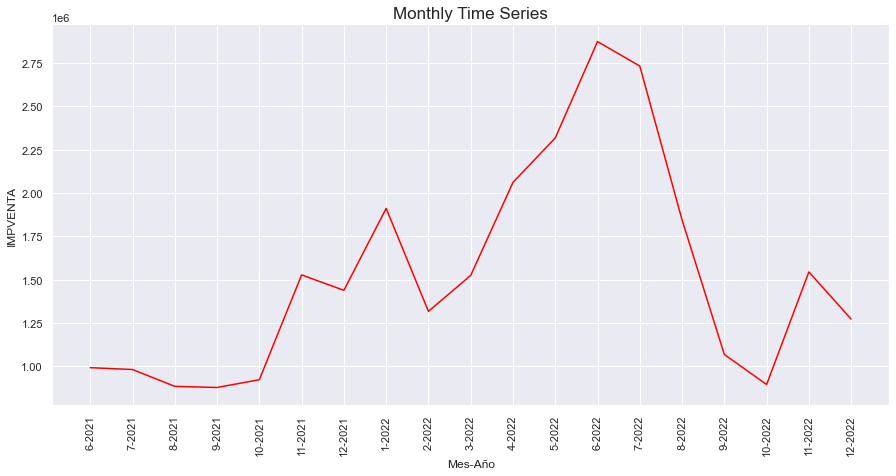

In [369]:
fig, ax = plt.subplots()

p=sns.lineplot(x="Mes-Año", y="IMPVENTA", data=Monthly_Time_Series_1 , color='red')

plt.setp(p.get_xticklabels(), rotation=90)

plt.title("Monthly Time Series",  fontsize = 17)

fig.savefig('p1.jpg', format='jpg', dpi=1200)

plt.show()

## Daily Time Series

In [370]:
Daily_Time_Series_1 = Time_Series_1.groupby(['Año', 'Mes','Dia'])['IMPVENTA'].sum().reset_index(drop=False)

In [371]:
Daily_Time_Series_1

,Año,Mes,Dia,IMPVENTA
0,2021,6,1,26423.78
1,2021,6,2,18752.01
2,2021,6,3,22812.84
3,2021,6,4,107889.11
4,2021,6,5,136714.44
...,...,...,...,...
574,2022,12,27,64542.49
575,2022,12,28,59913.84
576,2022,12,29,53815.43
577,2022,12,30,52695.32


In [372]:
Daily_Time_Series_1['Año'] = Daily_Time_Series_1['Año'].astype('string')
Daily_Time_Series_1['Mes'] = Daily_Time_Series_1['Mes'].astype('string')
Daily_Time_Series_1['Dia'] = Daily_Time_Series_1['Dia'].astype('string')

Daily_Time_Series_1['Dia-Mes-Año'] = Daily_Time_Series_1[['Dia', 'Mes', 'Año']].agg('-'.join, axis=1)

In [373]:
Daily_Time_Series_1

,Año,Mes,Dia,IMPVENTA,Dia-Mes-Año
0,2021,6,1,26423.78,1-6-2021
1,2021,6,2,18752.01,2-6-2021
2,2021,6,3,22812.84,3-6-2021
3,2021,6,4,107889.11,4-6-2021
4,2021,6,5,136714.44,5-6-2021
...,...,...,...,...,...
574,2022,12,27,64542.49,27-12-2022
575,2022,12,28,59913.84,28-12-2022
576,2022,12,29,53815.43,29-12-2022
577,2022,12,30,52695.32,30-12-2022


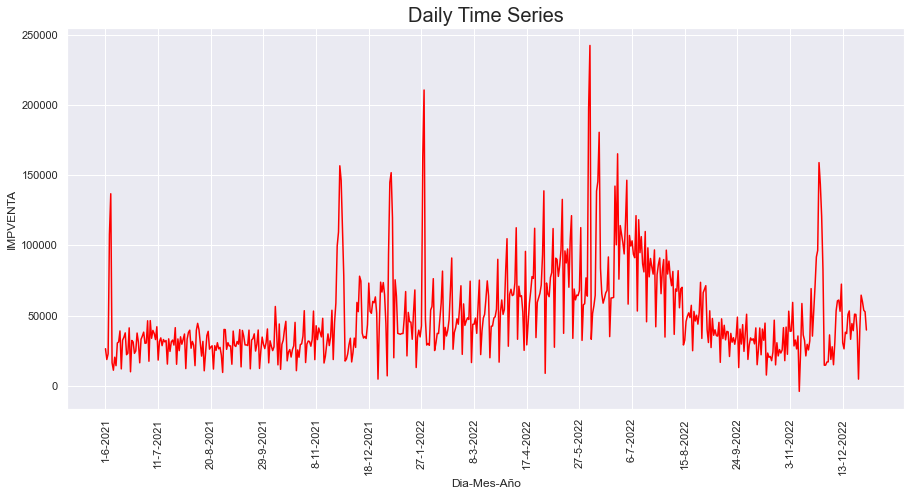

In [374]:
fig, ax = plt.subplots()

p=sns.lineplot(x="Dia-Mes-Año", y="IMPVENTA", data=Daily_Time_Series_1 , color='red')

p.set_xticks(np.arange(0 , len(Daily_Time_Series_1) , 40))

plt.setp(p.get_xticklabels(), rotation=90)

plt.title("Daily Time Series", fontsize = 20)

fig.savefig('p2.jpg', format='jpg', dpi=1200)

plt.show()

## Weekly Time Series

In [375]:
Weekly_Time_Series_1 = Time_Series_1.groupby(['Año', 'Mes','Semana'])['IMPVENTA'].sum().reset_index(drop=False)

In [376]:
Weekly_Time_Series_1['Año'] = Weekly_Time_Series_1['Año'].astype('string')
Weekly_Time_Series_1['Mes'] = Weekly_Time_Series_1['Mes'].astype('string')
Weekly_Time_Series_1['Semana'] = Weekly_Time_Series_1['Semana'].astype('string')

Weekly_Time_Series_1['Semana-Mes-Año'] = Weekly_Time_Series_1[['Semana', 'Mes', 'Año']].agg('-'.join, axis=1)

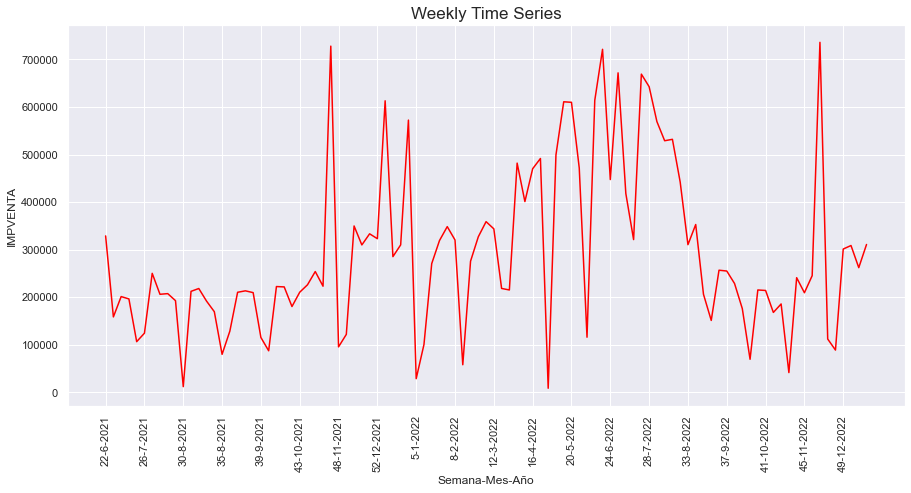

In [377]:
fig, ax = plt.subplots()

p=sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1 , color='red')

p.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 5))

plt.setp(p.get_xticklabels(), rotation=90)

plt.title("Weekly Time Series",  fontsize = 17)

fig.savefig('p3.jpg', format='jpg', dpi=1200)

plt.show()

## Quarter Time Series

In [378]:
Quarter_Time_Series_1 = Time_Series_1.groupby(['Año', 'Trimestre'])['IMPVENTA'].sum().reset_index(drop=False)

In [379]:
Quarter_Time_Series_1

,Año,Trimestre,IMPVENTA
0,2021,2,992891.50
1,2021,3,2745995.05
2,2021,4,3889761.78
3,2022,1,4752970.27
4,2022,2,7249462.41
5,2022,3,5644448.99
6,2022,4,3713061.59


In [380]:
Quarter_Time_Series_1['Año'] = Quarter_Time_Series_1['Año'].astype('string')
Quarter_Time_Series_1['Trimestre'] = Quarter_Time_Series_1['Trimestre'].astype('string')

Quarter_Time_Series_1['Trimestre-Año'] = Quarter_Time_Series_1[['Trimestre', 'Año']].agg('-'.join, axis=1)

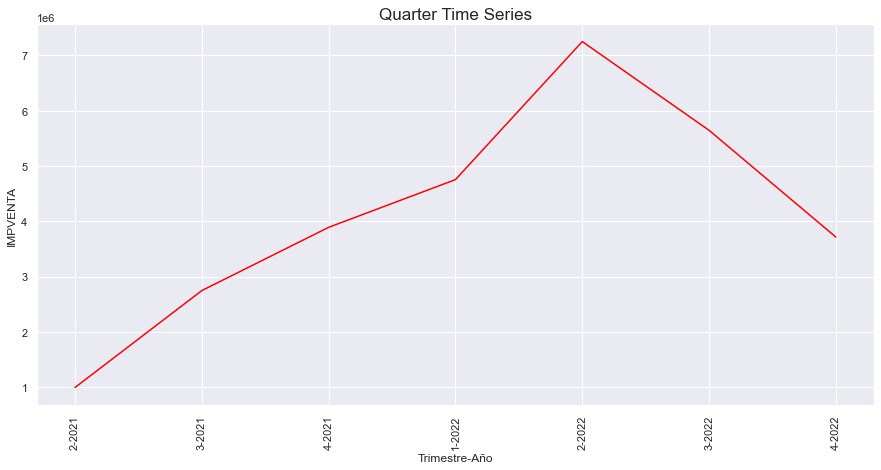

In [381]:
fig, ax = plt.subplots()

p=sns.lineplot(x="Trimestre-Año", y="IMPVENTA", data=Quarter_Time_Series_1 , color='red')

p.set_xticks(np.arange(0 , len(Quarter_Time_Series_1) , 1))

plt.setp(p.get_xticklabels(), rotation=90)

plt.title("Quarter Time Series",  fontsize = 17)

fig.savefig('p4.jpg', format='jpg', dpi=1200)

plt.show()

## Yearly Time Series

In [382]:
Time_Series_2 = pd.read_csv('Time_Series_2.csv')

In [383]:
Time_Series_2

,Referencia,Fecha,Cliente,Importe,Direccion,Localidad,Codigo Postal,Producto,Linea,Ancho,Largo,sexo,Edad
0,DK20220267,2022-11-12,"""CAYETANA 690031741""",120.0,NaN,NaN,NaN,no sé,no sé,1,1,M,no sé
1,DK20220265,2022-11-08,"""CONTADO TIENDA """,25.0,.,NaN,.,no sé,no sé,1,1,no sé,no sé
2,DK20220264,2022-11-08,"""CONTADO TIENDA """,25.0,.,NaN,.,no sé,no sé,1,1,no sé,no sé
3,DK20220263,2022-11-07,"""ANA DE ARMADA """,57.0,NaN,NaN,NaN,no sé,no sé,1,1,M,no sé
4,DK20220262,2022-11-05,"""LAURA DE GUZMAN """,245.0,NaN,NaN,NaN,no sé,no sé,1,1,M,no sé
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,DK18103,2018-09-17,"""BELEN MARTINEZ (FACCIA TOSTA)""",270.0,"""Pasaje de Caleruega, 13-2ﾺC""",Madrid,28033,no sé,no sé,1,1,no sé,no sé
1018,FAC18082,2018-07-03,"""GUSTAVO CARASA ANTON""",375.0,.,MADRID,28005,no sé,no sé,1,1,no sé,no sé
1019,FAC18081,2018-06-21,"""PALOMA SAEZ""",45.0,"""C/Santa Hortencia, 22-3ﾺD""",MADRID,28002,no sé,no sé,1,1,no sé,no sé
1020,FAC18080,2018-06-20,"""CONTADO TIENDA """,365.0,.,NaN,.,no sé,no sé,1,1,no sé,no sé


In [384]:
Time_Series_2['Fecha'] = pd.to_datetime(Time_Series_2['Fecha'])

Time_Series_2['Dia'] = Time_Series_2['Fecha'].dt.day

Time_Series_2['Semana'] = Time_Series_2['Fecha'].dt.week

Time_Series_2['Mes'] = Time_Series_2['Fecha'].dt.month

Time_Series_2['Trimestre'] = Time_Series_2['Fecha'].dt.quarter

Time_Series_2['Año'] = Time_Series_2['Fecha'].dt.year

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9676\590937400.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Time_Series_2['Semana'] = Time_Series_2['Fecha'].dt.week


In [385]:
Time_Series_2.loc[:,['Importe', 'Fecha', 'Dia', 'Semana', 'Mes', 'Trimestre', 'Año']]

,Importe,Fecha,Dia,Semana,Mes,Trimestre,Año
0,120.0,2022-11-12,12,45,11,4,2022
1,25.0,2022-11-08,8,45,11,4,2022
2,25.0,2022-11-08,8,45,11,4,2022
3,57.0,2022-11-07,7,45,11,4,2022
4,245.0,2022-11-05,5,44,11,4,2022
...,...,...,...,...,...,...,...
1017,270.0,2018-09-17,17,38,9,3,2018
1018,375.0,2018-07-03,3,27,7,3,2018
1019,45.0,2018-06-21,21,25,6,2,2018
1020,365.0,2018-06-20,20,25,6,2,2018


In [386]:
Yearly_Time_Series_2 = Time_Series_2.groupby(['Año'])['Importe'].sum().reset_index(drop=False)

In [387]:
Yearly_Time_Series_2

,Año,Importe
0,2018,20584.60
1,2019,52704.27
2,2020,81690.09
3,2021,97683.53
4,2022,95286.31


In [388]:
Yearly_Time_Series_2['Año'] = Yearly_Time_Series_2['Año'].astype('string')

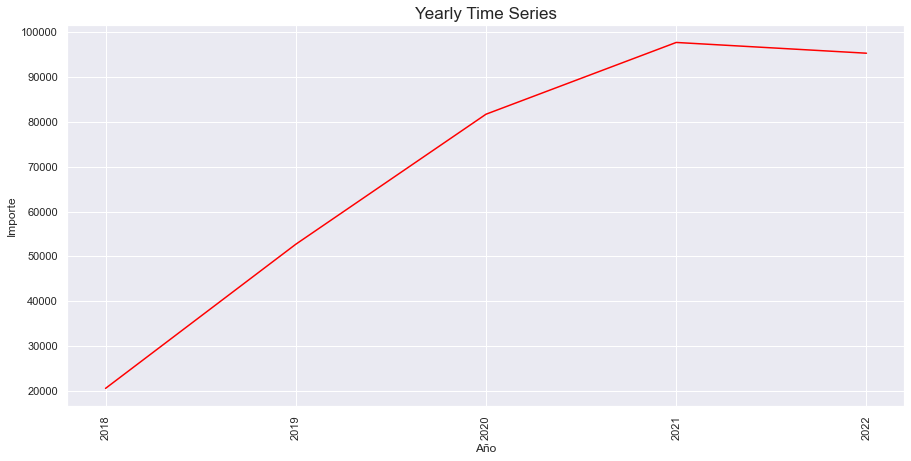

In [389]:
fig, ax = plt.subplots()

p=sns.lineplot(x="Año", y="Importe", data=Yearly_Time_Series_2 , color='red')

p.set_xticks(np.arange(0 , len(Yearly_Time_Series_2) , 1))

plt.setp(p.get_xticklabels(), rotation=90)

plt.title("Yearly Time Series",  fontsize = 17)

fig.savefig('p5.jpg', format='jpg', dpi=1200)

plt.show()

## Time Series Decomposition

In [390]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [391]:
Weekly_Time_Series_1

,Año,Mes,Semana,IMPVENTA,Semana-Mes-Año
0,2021,6,22,329029.82,22-6-2021
1,2021,6,23,158833.59,23-6-2021
2,2021,6,24,201568.21,24-6-2021
3,2021,6,25,196610.74,25-6-2021
4,2021,6,26,106849.14,26-6-2021
...,...,...,...,...,...
94,2022,12,48,89144.45,48-12-2022
95,2022,12,49,301484.19,49-12-2022
96,2022,12,50,308829.59,50-12-2022
97,2022,12,51,262326.49,51-12-2022


In [392]:
advanced_decomposition = STL(Weekly_Time_Series_1.IMPVENTA, period=4).fit()

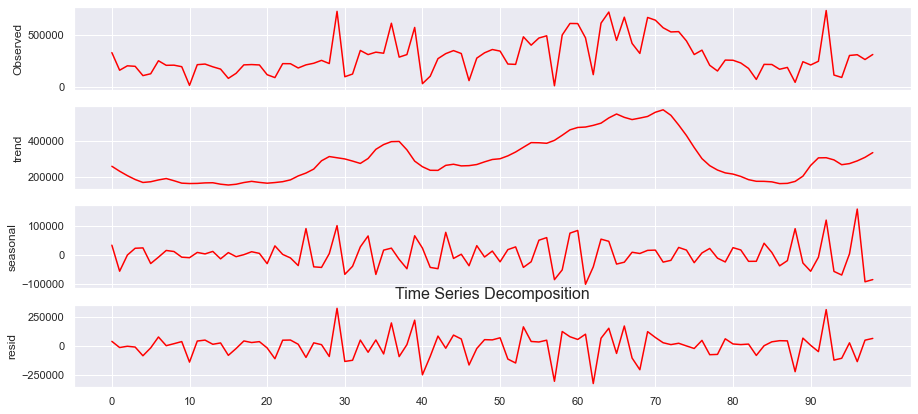

In [393]:
fig, axs = plt.subplots(nrows=4, ncols=1, sharex=True)

plt.title("Time Series Decomposition",  fontsize = 16)

p1=sns.lineplot(advanced_decomposition.observed, color='red', ax=axs[0])
p2=sns.lineplot(advanced_decomposition.trend, color='red', ax=axs[1])
p3=sns.lineplot(advanced_decomposition.seasonal, color='red', ax=axs[2])
p4=sns.lineplot(advanced_decomposition.resid, color='red', ax=axs[3])

p1.set_ylabel('Observed')
p2.set_ylabel('trend')
p3.set_ylabel('seasonal')
p4.set_ylabel('resid')

p1.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 10))

plt.setp(p1.get_xticklabels(), rotation=90)

fig.savefig('p6.jpg', format='jpg', dpi=1200)

plt.show()

The following graph has superimposed the observed series and the trend:

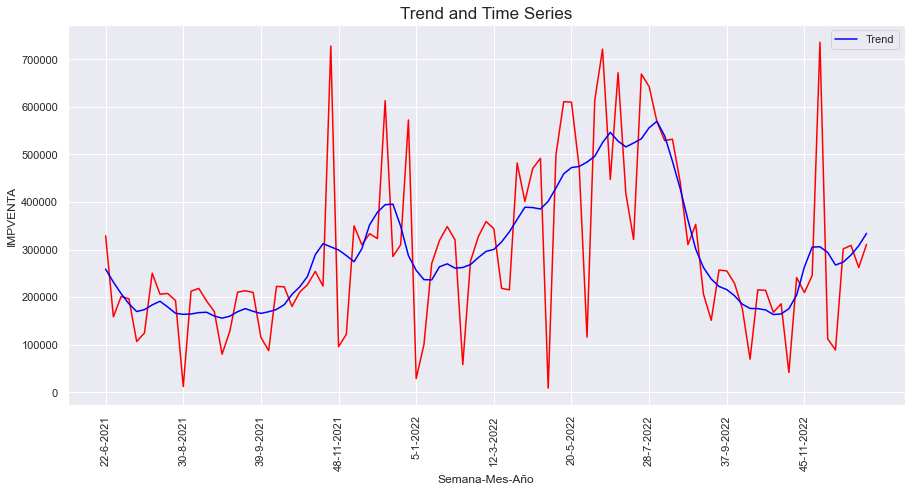

In [394]:
fig, ax = plt.subplots()

p1=sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1 , color='red')
p2=sns.lineplot(advanced_decomposition.trend, color='blue', linestyle='-', label='Trend')

p1.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 10))

plt.setp(p1.get_xticklabels(), rotation=90)

plt.title("Trend and Time Series",  fontsize = 17)

fig.savefig('p7.jpg', format='jpg', dpi=1200)

plt.show()

## Forecasting test time series 

### Weekly time series - forecasting with historical mean

In [395]:
Weekly_Time_Series_1

,Año,Mes,Semana,IMPVENTA,Semana-Mes-Año
0,2021,6,22,329029.82,22-6-2021
1,2021,6,23,158833.59,23-6-2021
2,2021,6,24,201568.21,24-6-2021
3,2021,6,25,196610.74,25-6-2021
4,2021,6,26,106849.14,26-6-2021
...,...,...,...,...,...
94,2022,12,48,89144.45,48-12-2022
95,2022,12,49,301484.19,49-12-2022
96,2022,12,50,308829.59,50-12-2022
97,2022,12,51,262326.49,51-12-2022


In [396]:
Weekly_Time_Series_1.tail(8)

,Año,Mes,Semana,IMPVENTA,Semana-Mes-Año
91,2022,11,46,245475.82,46-11-2022
92,2022,11,47,735813.99,47-11-2022
93,2022,11,48,112353.00,48-11-2022
94,2022,12,48,89144.45,48-12-2022
95,2022,12,49,301484.19,49-12-2022
96,2022,12,50,308829.59,50-12-2022
97,2022,12,51,262326.49,51-12-2022
98,2022,12,52,311029.97,52-12-2022


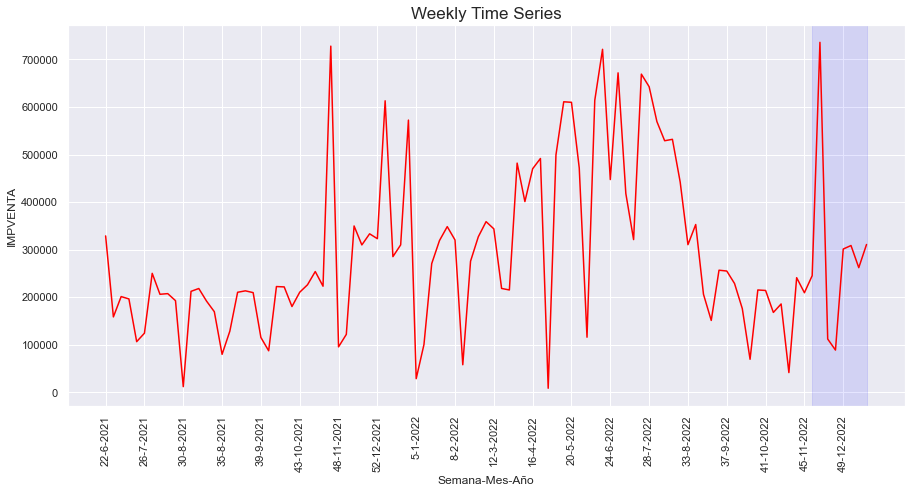

In [397]:
fig, ax = plt.subplots()

p=sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1 , color='red')

p.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 5))

plt.setp(p.get_xticklabels(), rotation=90)

plt.title("Weekly Time Series",  fontsize = 17)

ax.axvspan(91, 98, color='blue', alpha=0.1) # last eight weeks

# fig.savefig('p3.jpg', format='jpg', dpi=1200)

plt.show()

In [398]:
Weekly_Time_Series_1_test = Weekly_Time_Series_1.tail(8)

In [399]:
Weekly_Time_Series_1_test

,Año,Mes,Semana,IMPVENTA,Semana-Mes-Año
91,2022,11,46,245475.82,46-11-2022
92,2022,11,47,735813.99,47-11-2022
93,2022,11,48,112353.00,48-11-2022
94,2022,12,48,89144.45,48-12-2022
95,2022,12,49,301484.19,49-12-2022
96,2022,12,50,308829.59,50-12-2022
97,2022,12,51,262326.49,51-12-2022
98,2022,12,52,311029.97,52-12-2022


In [400]:
Weekly_Time_Series_1_train = Weekly_Time_Series_1.drop( Weekly_Time_Series_1_test.index , axis=0)

In [401]:
Weekly_Time_Series_1_train

,Año,Mes,Semana,IMPVENTA,Semana-Mes-Año
0,2021,6,22,329029.82,22-6-2021
1,2021,6,23,158833.59,23-6-2021
2,2021,6,24,201568.21,24-6-2021
3,2021,6,25,196610.74,25-6-2021
4,2021,6,26,106849.14,26-6-2021
...,...,...,...,...,...
86,2022,10,42,168241.63,42-10-2022
87,2022,10,43,186040.66,43-10-2022
88,2022,10,44,41834.72,44-10-2022
89,2022,11,44,241248.48,44-11-2022


In [402]:
Historical_mean_train = Weekly_Time_Series_1_train['IMPVENTA'].mean()

In [403]:
Weekly_Time_Series_1_test.loc[:,'predict_hist_mean'] = Historical_mean_train

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9676\1202782904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Weekly_Time_Series_1_test.loc[:,'predict_hist_mean'] = Historical_mean_train


In [404]:
Weekly_Time_Series_1_test

,Año,Mes,Semana,IMPVENTA,Semana-Mes-Año,predict_hist_mean
91,2022,11,46,245475.82,46-11-2022,292550.924066
92,2022,11,47,735813.99,47-11-2022,292550.924066
93,2022,11,48,112353.00,48-11-2022,292550.924066
94,2022,12,48,89144.45,48-12-2022,292550.924066
95,2022,12,49,301484.19,49-12-2022,292550.924066
96,2022,12,50,308829.59,50-12-2022,292550.924066
97,2022,12,51,262326.49,51-12-2022,292550.924066
98,2022,12,52,311029.97,52-12-2022,292550.924066


In [405]:
def mape(y_true, y_pred):
    
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [406]:
mape_hist_mean = mape(Weekly_Time_Series_1_test['IMPVENTA'], Weekly_Time_Series_1_test['predict_hist_mean'])

mape_hist_mean

61.70964279179175

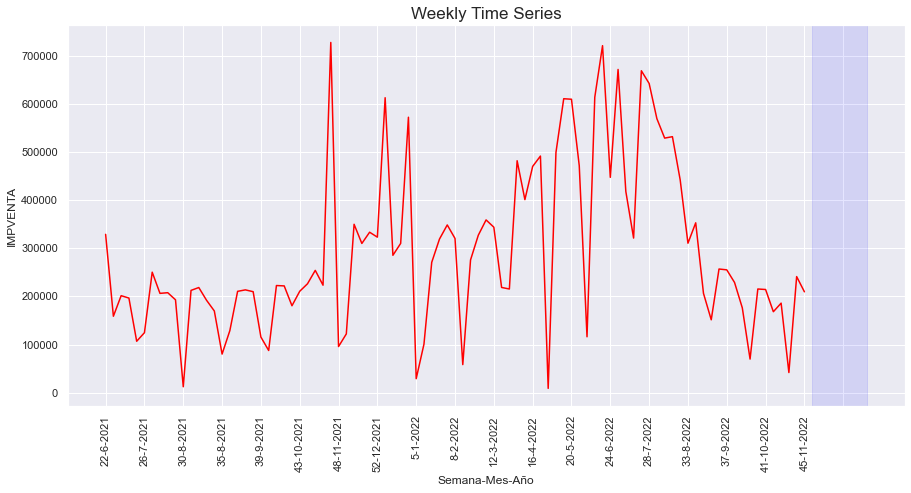

In [407]:
fig, ax = plt.subplots()

p=sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1_train , color='red')

p.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 5))

plt.setp(p.get_xticklabels(), rotation=90)

plt.title("Weekly Time Series",  fontsize = 17)

ax.axvspan(91, 98, color='blue', alpha=0.1) # last eight weeks

# fig.savefig('p3.jpg', format='jpg', dpi=1200)


In [408]:
Weekly_Time_Series_1_train

,Año,Mes,Semana,IMPVENTA,Semana-Mes-Año
0,2021,6,22,329029.82,22-6-2021
1,2021,6,23,158833.59,23-6-2021
2,2021,6,24,201568.21,24-6-2021
3,2021,6,25,196610.74,25-6-2021
4,2021,6,26,106849.14,26-6-2021
...,...,...,...,...,...
86,2022,10,42,168241.63,42-10-2022
87,2022,10,43,186040.66,43-10-2022
88,2022,10,44,41834.72,44-10-2022
89,2022,11,44,241248.48,44-11-2022


In [409]:
Weekly_Time_Series_1_test

,Año,Mes,Semana,IMPVENTA,Semana-Mes-Año,predict_hist_mean
91,2022,11,46,245475.82,46-11-2022,292550.924066
92,2022,11,47,735813.99,47-11-2022,292550.924066
93,2022,11,48,112353.00,48-11-2022,292550.924066
94,2022,12,48,89144.45,48-12-2022,292550.924066
95,2022,12,49,301484.19,49-12-2022,292550.924066
96,2022,12,50,308829.59,50-12-2022,292550.924066
97,2022,12,51,262326.49,51-12-2022,292550.924066
98,2022,12,52,311029.97,52-12-2022,292550.924066


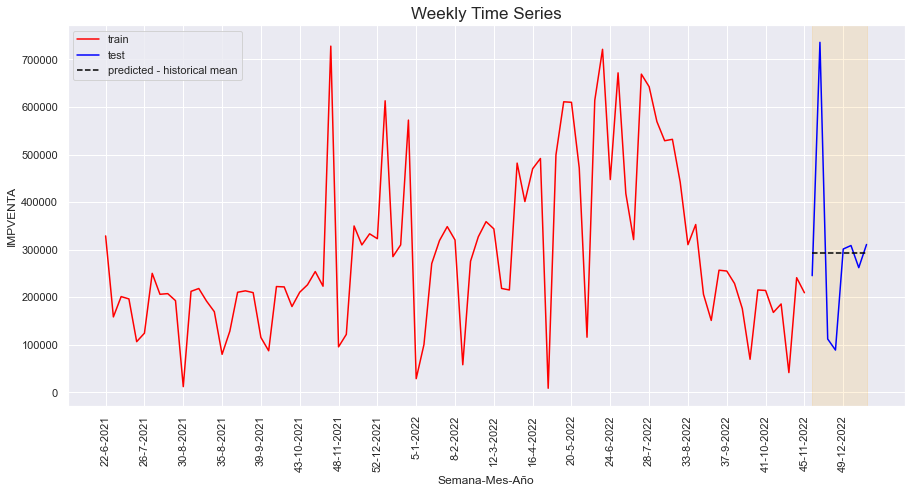

In [410]:
fig, ax = plt.subplots()

p1 = sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1_train , color='red', label='train')

p2 = sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1_test , color='blue', label='test')

p3 = sns.lineplot(x="Semana-Mes-Año", y="predict_hist_mean", data=Weekly_Time_Series_1_test , color='black', linestyle='--', label='predicted - historical mean')

p1.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 5))

plt.setp(p1.get_xticklabels(), rotation=90)

plt.title("Weekly Time Series",  fontsize = 17)

ax.axvspan(91, 98, color='orange', alpha=0.13) # last eight weeks

fig.savefig('p8.jpg', format='jpg', dpi=1200)


### Weekly Time Series - Predicting with last k periods mean

In [411]:
k=6

In [412]:
last_k_periods_mean_train = Weekly_Time_Series_1_train.tail(k)['IMPVENTA'].mean()

In [413]:
Weekly_Time_Series_1_test.loc[: , 'last_k_periods_mean_train'] = last_k_periods_mean_train

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9676\3960696509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Weekly_Time_Series_1_test.loc[: , 'last_k_periods_mean_train'] = last_k_periods_mean_train


In [414]:
Weekly_Time_Series_1_test

,Año,Mes,Semana,IMPVENTA,Semana-Mes-Año,predict_hist_mean,last_k_periods_mean_train
91,2022,11,46,245475.82,46-11-2022,292550.924066,176893.885
92,2022,11,47,735813.99,47-11-2022,292550.924066,176893.885
93,2022,11,48,112353.00,48-11-2022,292550.924066,176893.885
94,2022,12,48,89144.45,48-12-2022,292550.924066,176893.885
95,2022,12,49,301484.19,49-12-2022,292550.924066,176893.885
96,2022,12,50,308829.59,50-12-2022,292550.924066,176893.885
97,2022,12,51,262326.49,51-12-2022,292550.924066,176893.885
98,2022,12,52,311029.97,52-12-2022,292550.924066,176893.885


In [415]:
mape_last_k_periods_mean = mape(Weekly_Time_Series_1_test['IMPVENTA'], Weekly_Time_Series_1_test['last_k_periods_mean_train'])

mape_last_k_periods_mean

52.43977367176916

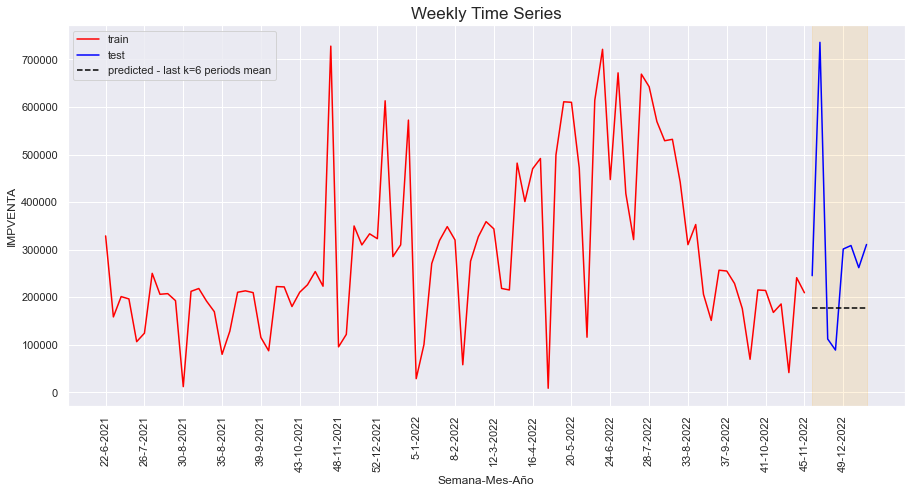

In [416]:
fig, ax = plt.subplots()

p1 = sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1_train , color='red', label='train')

p2 = sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1_test , color='blue', label='test')

p3 = sns.lineplot(x="Semana-Mes-Año", y="last_k_periods_mean_train", data=Weekly_Time_Series_1_test , color='black', linestyle='--', label='predicted - last k=6 periods mean')

p1.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 5))

plt.setp(p1.get_xticklabels(), rotation=90)

plt.title("Weekly Time Series",  fontsize = 17)

ax.axvspan(91, 98, color='orange', alpha=0.13) # last eight weeks

fig.savefig('p9.jpg', format='jpg', dpi=1200)


### Weekly Time Series - Predicting with last k periods median

In [417]:
k=6

last_k_periods_median_train = Weekly_Time_Series_1_train.tail(k)['IMPVENTA'].median()

Weekly_Time_Series_1_test.loc[: , 'last_k_periods_median_train'] = last_k_periods_median_train


C:\Users\Usuario\AppData\Local\Temp\ipykernel_9676\1741488365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Weekly_Time_Series_1_test.loc[: , 'last_k_periods_median_train'] = last_k_periods_median_train


In [418]:
mape_last_k_periods_median = mape(Weekly_Time_Series_1_test['IMPVENTA'], Weekly_Time_Series_1_test['last_k_periods_mean_train'])
mape_last_k_periods_median

52.43977367176916

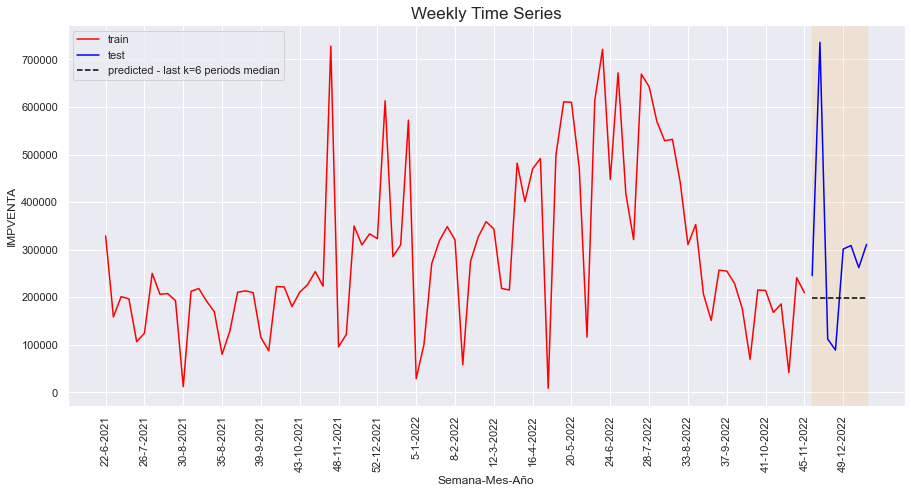

In [419]:
fig, ax = plt.subplots()

p1 = sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1_train , color='red', label='train')

p2 = sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1_test , color='blue', label='test')

p3 = sns.lineplot(x="Semana-Mes-Año", y="last_k_periods_median_train", data=Weekly_Time_Series_1_test , color='black', linestyle='--', label='predicted - last k=6 periods median')

p1.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 5))

plt.setp(p1.get_xticklabels(), rotation=90)

plt.title("Weekly Time Series",  fontsize = 17)

ax.axvspan(91, 98, color='orange', alpha=0.13) # last eight weeks

fig.savefig('p10.jpg', format='jpg', dpi=1200)


### Forecasting with last k periods train time serie

In [420]:
k=len(Weekly_Time_Series_1_test)

In [421]:
last_k_periods_train_time_series = Weekly_Time_Series_1_train['IMPVENTA'].tail(k)

In [422]:
last_k_periods_train_time_series.name = 'last_k_periods_train_time_series'

In [424]:
# necesario para concatenar por columns Weekly_Time_Series_1_test y last_k_periods_train_time_series, y que se mantenga el indice de Weekly_Time_Series_1_test
last_k_periods_train_time_series.index = Weekly_Time_Series_1_test.index

In [425]:
pd.concat([Weekly_Time_Series_1_test, last_k_periods_train_time_series], axis=1)

,Año,Mes,Semana,IMPVENTA,Semana-Mes-Año,predict_hist_mean,last_k_periods_mean_train,last_k_periods_median_train,last_k_periods_train_time_series
91,2022,11,46,245475.82,46-11-2022,292550.924066,176893.885,197830.49,69790.87
92,2022,11,47,735813.99,47-11-2022,292550.924066,176893.885,197830.49,215449.91
93,2022,11,48,112353.00,48-11-2022,292550.924066,176893.885,197830.49,214377.50
94,2022,12,48,89144.45,48-12-2022,292550.924066,176893.885,197830.49,168241.63
95,2022,12,49,301484.19,49-12-2022,292550.924066,176893.885,197830.49,186040.66
96,2022,12,50,308829.59,50-12-2022,292550.924066,176893.885,197830.49,41834.72
97,2022,12,51,262326.49,51-12-2022,292550.924066,176893.885,197830.49,241248.48
98,2022,12,52,311029.97,52-12-2022,292550.924066,176893.885,197830.49,209620.32


In [426]:
Weekly_Time_Series_1_test = pd.concat([Weekly_Time_Series_1_test, last_k_periods_train_time_series], axis=1)

In [427]:
Weekly_Time_Series_1_test

,Año,Mes,Semana,IMPVENTA,Semana-Mes-Año,predict_hist_mean,last_k_periods_mean_train,last_k_periods_median_train,last_k_periods_train_time_series
91,2022,11,46,245475.82,46-11-2022,292550.924066,176893.885,197830.49,69790.87
92,2022,11,47,735813.99,47-11-2022,292550.924066,176893.885,197830.49,215449.91
93,2022,11,48,112353.00,48-11-2022,292550.924066,176893.885,197830.49,214377.50
94,2022,12,48,89144.45,48-12-2022,292550.924066,176893.885,197830.49,168241.63
95,2022,12,49,301484.19,49-12-2022,292550.924066,176893.885,197830.49,186040.66
96,2022,12,50,308829.59,50-12-2022,292550.924066,176893.885,197830.49,41834.72
97,2022,12,51,262326.49,51-12-2022,292550.924066,176893.885,197830.49,241248.48
98,2022,12,52,311029.97,52-12-2022,292550.924066,176893.885,197830.49,209620.32


In [428]:
mape_last_k_periods_train_time_series = mape(Weekly_Time_Series_1_test['IMPVENTA'], Weekly_Time_Series_1_test['last_k_periods_train_time_series'])

mape_last_k_periods_train_time_series

60.901249793430644

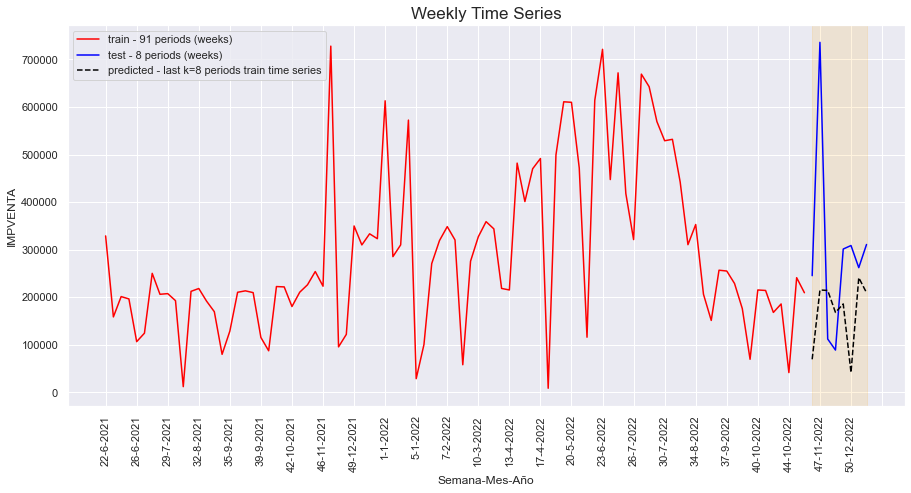

In [436]:
fig, ax = plt.subplots()

p1 = sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1_train , color='red', label='train - 91 periods (weeks)')

p2 = sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1_test , color='blue', label='test - 8 periods (weeks)')

p3 = sns.lineplot(x="Semana-Mes-Año", y="last_k_periods_train_time_series", data=Weekly_Time_Series_1_test , color='black', linestyle='--', label='predicted - last k=8 periods train time series')

p1.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 4))

plt.setp(p1.get_xticklabels(), rotation=90)

plt.title("Weekly Time Series",  fontsize = 17)

ax.axvspan(91, 98, color='orange', alpha=0.13) # last eight weeks

fig.savefig('p11.jpg', format='jpg', dpi=1200)

## Forecasting the future

In [161]:
Time_Series_1_Future_Predictions = pd.DataFrame(index=range(99, 99+200)) 

In [162]:
# Crea una lista con la fecha
initial_date = ['2022-12-31']

# Convierte la lista en una serie de fechas
initial_date = pd.to_datetime(initial_date)

# Obtén las 200 fechas siguientes
next_dates = [ initial_date[0] + pd.Timedelta(days=i)  for i in range(1, 1+200) ]

# Convierte las fechas siguientes en una serie
next_dates = pd.to_datetime(next_dates)

In [163]:
Time_Series_1_Future_Predictions['Fecha'] = next_dates

In [164]:
Time_Series_1_Future_Predictions['Fecha'] = pd.to_datetime(Time_Series_1_Future_Predictions['Fecha'])

Time_Series_1_Future_Predictions['Dia'] = Time_Series_1_Future_Predictions['Fecha'].dt.day

Time_Series_1_Future_Predictions['Semana'] = Time_Series_1_Future_Predictions['Fecha'].dt.week

Time_Series_1_Future_Predictions['Mes'] = Time_Series_1_Future_Predictions['Fecha'].dt.month

Time_Series_1_Future_Predictions['Trimestre'] = Time_Series_1_Future_Predictions['Fecha'].dt.quarter

Time_Series_1_Future_Predictions['Año'] = Time_Series_1_Future_Predictions['Fecha'].dt.year

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9676\1790077679.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Time_Series_1_Future_Predictions['Semana'] = Time_Series_1_Future_Predictions['Fecha'].dt.week


In [165]:
Time_Series_1_Future_Predictions

,Fecha,Dia,Semana,Mes,Trimestre,Año
99,2023-01-01,1,52,1,1,2023
100,2023-01-02,2,1,1,1,2023
101,2023-01-03,3,1,1,1,2023
102,2023-01-04,4,1,1,1,2023
103,2023-01-05,5,1,1,1,2023
...,...,...,...,...,...,...
294,2023-07-15,15,28,7,3,2023
295,2023-07-16,16,28,7,3,2023
296,2023-07-17,17,29,7,3,2023
297,2023-07-18,18,29,7,3,2023


### Weekly time series - forecasting with historical mean

In [176]:
Time_Series_1_Future_Predictions['IMPVENTA'] = np.nan

In [203]:
Time_Series_1_Future_Predictions

,Fecha,Dia,Semana,Mes,Trimestre,Año,Semana-Mes-Año,IMPVENTA,predict_hist_mean
99,2023-01-01,1,52,1,1,2023,52-1-2023,NaN,292814.056465
100,2023-01-02,2,1,1,1,2023,1-1-2023,NaN,292814.056465
101,2023-01-03,3,1,1,1,2023,1-1-2023,NaN,292814.056465
102,2023-01-04,4,1,1,1,2023,1-1-2023,NaN,292814.056465
103,2023-01-05,5,1,1,1,2023,1-1-2023,NaN,292814.056465
...,...,...,...,...,...,...,...,...,...
294,2023-07-15,15,28,7,3,2023,28-7-2023,NaN,292814.056465
295,2023-07-16,16,28,7,3,2023,28-7-2023,NaN,292814.056465
296,2023-07-17,17,29,7,3,2023,29-7-2023,NaN,292814.056465
297,2023-07-18,18,29,7,3,2023,29-7-2023,NaN,292814.056465


In [212]:
Weekly_Time_Series_1_Future_Predictions =  Time_Series_1_Future_Predictions.groupby(['Año', 'Mes','Semana'])['IMPVENTA'].sum().reset_index()

In [213]:
Weekly_Time_Series_1_Future_Predictions['IMPVENTA'] = np.nan

In [ ]:
Historical_mean = Weekly_Time_Series_1['IMPVENTA'].mean()

In [214]:
Weekly_Time_Series_1_Future_Predictions['predict_hist_mean'] = Historical_mean

In [217]:
Weekly_Time_Series_1_Future_Predictions['Año'] = Weekly_Time_Series_1_Future_Predictions['Año'].astype('string')
Weekly_Time_Series_1_Future_Predictions['Mes'] = Weekly_Time_Series_1_Future_Predictions['Mes'].astype('string')
Weekly_Time_Series_1_Future_Predictions['Semana'] = Weekly_Time_Series_1_Future_Predictions['Semana'].astype('string')

In [218]:
Weekly_Time_Series_1_Future_Predictions['Semana-Mes-Año'] = Weekly_Time_Series_1_Future_Predictions[['Semana', 'Mes', 'Año']].agg('-'.join, axis=1)

In [219]:
Weekly_Time_Series_1_Future_Predictions

,Año,Mes,Semana,IMPVENTA,predict_hist_mean,Semana-Mes-Año
0,2023,1,1,NaN,292814.056465,1-1-2023
1,2023,1,2,NaN,292814.056465,2-1-2023
2,2023,1,3,NaN,292814.056465,3-1-2023
3,2023,1,4,NaN,292814.056465,4-1-2023
4,2023,1,5,NaN,292814.056465,5-1-2023
5,2023,1,52,NaN,292814.056465,52-1-2023
6,2023,2,5,NaN,292814.056465,5-2-2023
7,2023,2,6,NaN,292814.056465,6-2-2023
8,2023,2,7,NaN,292814.056465,7-2-2023
9,2023,2,8,NaN,292814.056465,8-2-2023


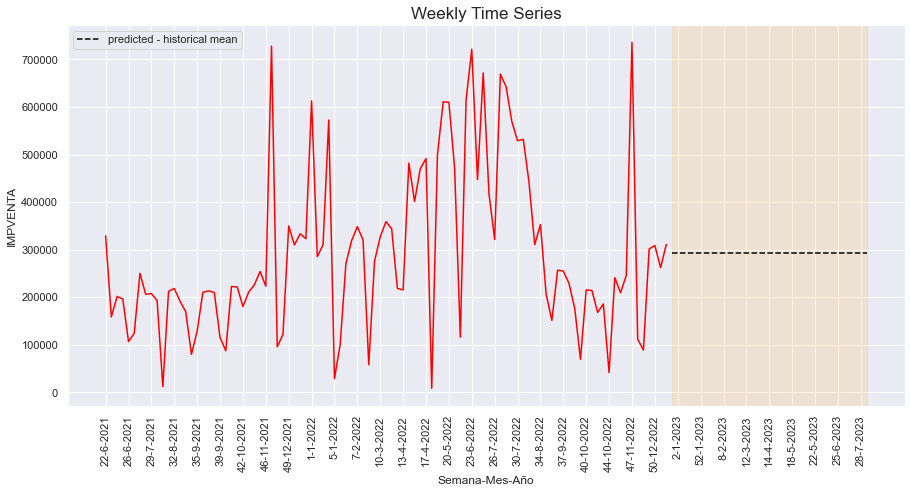

In [224]:
fig, ax = plt.subplots()

p1 = sns.lineplot(x="Semana-Mes-Año", y="IMPVENTA", data=Weekly_Time_Series_1 , color='red')

p2 = sns.lineplot(x="Semana-Mes-Año", y="predict_hist_mean", data=Weekly_Time_Series_1_Future_Predictions , color='black', linestyle='--', label='predicted - historical mean')

p1.set_xticks(np.arange(0 , 99+34, 4))

plt.setp(p1.get_xticklabels(), rotation=90)

plt.title("Weekly Time Series",  fontsize = 17)

ax.axvspan(99, 99+34, color='orange', alpha=0.13) # last eight weeks

fig.savefig('p9.jpg', format='jpg', dpi=1200)
